In [13]:
import torch # PyTorch
import torch.nn as nn # Neural Network package
import torch.optim as optim # Optimization package
from torchvision import datasets, transforms # Datasets and transformations
from torch.utils.data import DataLoader # Dataloader
import matplotlib.pyplot as plt # Plotting
import numpy as np # Numpy


In [14]:
# Define transformations (resize, convert to tensor, normalize)
transform = transforms.Compose([ # Compose multiple transformations
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),          # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize (optional) 
])

# Load dataset
dataset_path = r"C:\Users\USER\Desktop\SafeStreet\dataset"  # Update with correct path
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform) # Load dataset

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Check class labels
print("Class labels:", train_dataset.classes)  # ['apples', 'oranges']


Class labels: ['Not a Road', 'Road']


In [15]:
class CNN(nn.Module): # Convolutional Neural Network
    def __init__(self): # Constructor
        super(CNN, self).__init__() # Superclass constructor
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1) # Convolutional layer
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1) 
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2) # Max pooling layer
        self.fc1 = nn.Linear(64 * 16 * 16, 128) # Fully connected
        self.fc2 = nn.Linear(128, 1)  # Output = 1 for binary classification
        self.sigmoid = nn.Sigmoid() # Sigmoid activation function

    def forward(self, x): # Forward pass
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x))) # ReLU activation
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = x.view(-1, 64 * 16 * 16)  # Flatten
        x = nn.ReLU()(self.fc1(x)) # Fully connected layer
        x = self.fc2(x)
        x = self.sigmoid(x)  # Sigmoid for binary classification
        return x


In [16]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
num_epochs = 10  # Adjust as needed

for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.float().to(device)
        labels = labels.view(-1, 1)  # Reshape for binary classification

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

print("Training complete!")


Epoch [1/10], Loss: 0.6221
Epoch [2/10], Loss: 0.4569
Epoch [3/10], Loss: 0.2934
Epoch [4/10], Loss: 0.2716
Epoch [5/10], Loss: 0.2174
Epoch [6/10], Loss: 0.1596


In [ ]:
# Save the trained model
model_path = "road.pth" # Update with correct path
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}") # Model saved to apple_orange_cnn.pth


Model saved to road.pth


In [ ]:
# Load model
model = CNN().to(device)  # Initialize model
model.load_state_dict(torch.load("road.pth"))
model.eval()  # Set to evaluation mode
print("Model loaded successfully!")


Model loaded successfully!


RuntimeError: Given groups=1, weight of size [16, 3, 3, 3], expected input[1, 4, 128, 128] to have 3 channels, but got 4 channels instead

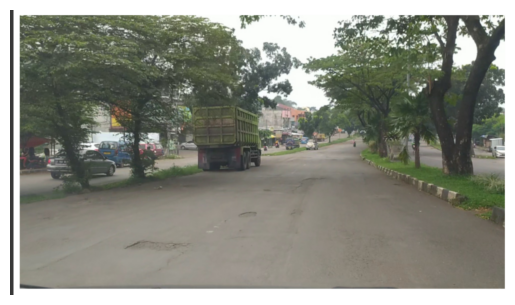

In [ ]:

import PIL.Image as Image # Image module
def predict_image(image_path): # Function to predict image
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0).to(device)  # Preprocess image
    with torch.no_grad():
        output = model(image)
    prediction = "Not a Road" if output.item() < 0.5 else "Road"
    return prediction
# Example usage
test_image_path = r"C:\Users\USER\Pictures\Screenshots\Screenshot 2025-03-27 150439.png" # Change to any test image
plt.imshow(Image.open(test_image_path))
plt.axis("off")
plt.title(f"Predicted: {predict_image(test_image_path)}")
plt.show()


Class labels: ['Not a Road', 'Road']
Class distribution: Counter({1: 86, 0: 50})
Epoch [1/10], Loss: 0.6244
Epoch [2/10], Loss: 0.3896
Epoch [3/10], Loss: 0.3456
Epoch [4/10], Loss: 0.2341
Epoch [5/10], Loss: 0.1788
Epoch [6/10], Loss: 0.2060
Epoch [7/10], Loss: 0.1124
Epoch [8/10], Loss: 0.1564
Epoch [9/10], Loss: 0.1026
Epoch [10/10], Loss: 0.0613
Training complete!
Model saved to road.pth
Model loaded successfully!
Predicted probability: 0.9996


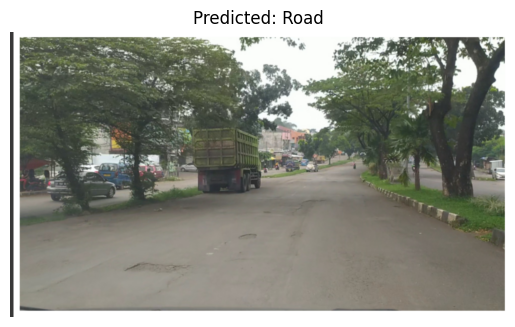

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from collections import Counter
import os

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define image transformations (for RGB images)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Fixed for RGB
])

# Load dataset
dataset_path = r"C:\Users\USER\Desktop\SafeStreet\dataset"  # Update as needed
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)

# Check class labels
print("Class labels:", train_dataset.classes)
print("Class distribution:", Counter(train_dataset.targets))

# CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = x.view(-1, 64 * 16 * 16)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Initialize model
model = CNN().to(device)

# Binary Cross Entropy Loss and Adam Optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.float().view(-1, 1).to(device)  # Shape: (batch_size, 1)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

print("Training complete!")

# Save model
model_path = "road.pth"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Load the model for prediction
model = CNN().to(device)
model.load_state_dict(torch.load("road.pth"))
model.eval()
print("Model loaded successfully!")

# Prediction function
def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0).to(device)

    with torch.no_grad():
        output = model(image)
        prob = output.item()
        print(f"Predicted probability: {prob:.4f}")

        prediction = "Road" if prob >= 0.5 else "Not a Road"
        return prediction


# Example prediction
test_image_path = r"C:\Users\USER\Pictures\Screenshots\Screenshot 2025-03-27 150439.png"
plt.imshow(Image.open(test_image_path))
plt.axis("off")
plt.title(f"Predicted: {predict_image(test_image_path)}")
plt.show()
